In [11]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import sklearn.tree

In [2]:
from numpy.random import default_rng

rng = default_rng()

vals = rng.standard_normal(size=(2, 10000))

In [3]:
df = pd.DataFrame(vals.T, columns=["x1", "x2"])

x3 is a linear combination of x1 and x2.

In [4]:
df["x3"] = df["x1"] + df["x2"]

In [5]:
df["label"] = df["x3"] > 0

In [6]:
model_two_features = sklearn.tree.DecisionTreeClassifier(max_depth=3)
model_two_features.fit(df[["x1", "x2"]], df["label"])

DecisionTreeClassifier(max_depth=3)

In [7]:
model_three_features = sklearn.tree.DecisionTreeClassifier(max_depth=3)
model_three_features.fit(df[["x1", "x2", "x3"]], df["label"])

DecisionTreeClassifier(max_depth=3)

In [8]:
df['pred_by_two_features'] = model_two_features.predict(df[['x1', 'x2']])
df['pred_by_three_features'] = model_three_features.predict(df[['x1', 'x2', 'x3']])

[Text(0.5, 1.0, 'Decision boundary of model using three features')]

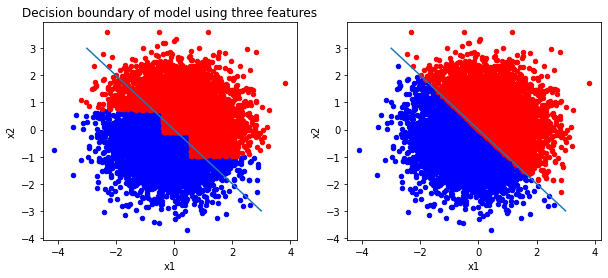

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.ravel()

df.loc[lambda df: df.pred_by_two_features == 0].plot.scatter(x='x1', y='x2', ax=axes[0], color='blue')
df.loc[lambda df: df.pred_by_two_features == 1].plot.scatter(x='x1', y='x2', ax=axes[0], color='red')
axes[0].plot([-3, 3], [3, -3])
axes[0].set(title='Decision boundary of model using two features')

df.loc[lambda df: df.pred_by_three_features == 0].plot.scatter(x='x1', y='x2', ax=axes[1], color='blue')
df.loc[lambda df: df.pred_by_three_features == 1].plot.scatter(x='x1', y='x2', ax=axes[1], color='red')
axes[1].plot([-3, 3], [3, -3])
axes[0].set(title='Decision boundary of model using three features')

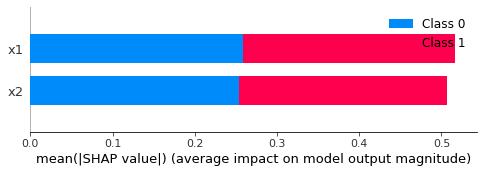

In [12]:
explainer = shap.Explainer(model_two_features)
shap_values = explainer.shap_values(df[['x1', 'x2']])
shap.summary_plot(shap_values, df[['x1', 'x2']])

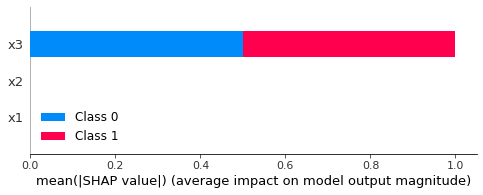

In [13]:
explainer = shap.Explainer(model_three_features)
shap_values = explainer.shap_values(df[['x1', 'x2', 'x3']])
shap.summary_plot(shap_values, df[['x1', 'x2', 'x3']])

So in the presence of x3, the x1 and x2 are NOT used, hence their importance is zero.